In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from scipy.optimize import leastsq


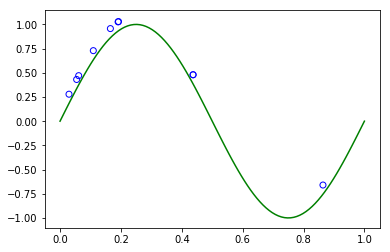

In [2]:
N=10
x_train=np.random.rand(N)
y_train=np.sin(2*np.pi*x_train)+np.random.uniform(0,0.1)
x= np.linspace(0, 1, 100)
y =np.sin(2*np.pi*x)

plt.scatter(x_train,y_train,facecolor="none",edgecolor="blue")
plt.plot(x,y,color='green')
plt.show()


In [3]:
#change degree

In [4]:
def real_func(x):
    return np.sin(2 * np.pi * x)
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)
def residuals_func(p, y, x):
    ret = fit_func(p, x) - y
    return ret 
x = np.linspace(0, 1, N)
x_points = np.linspace(0, 1, 100)
y0 = real_func(x)
y1 = [np.random.normal(0, 0.1) + y for y in y0] 

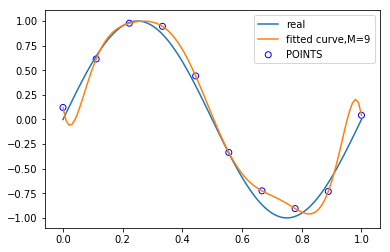

In [5]:
p_init = np.random.randn(10)  # initialize
plsq = leastsq(residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve,M=9')
pl.scatter(x, y1,label='POINTS',facecolor="none",edgecolor="blue")
pl.legend()
pl.show()

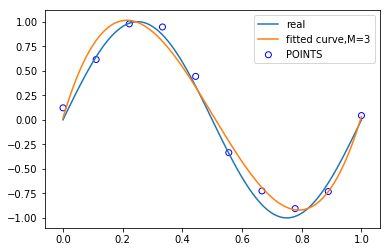

In [6]:
p_init = np.random.randn(4)  
plsq = leastsq(residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve,M=3')
pl.scatter(x, y1,label='POINTS',facecolor="none",edgecolor="blue")
pl.legend()
pl.show()

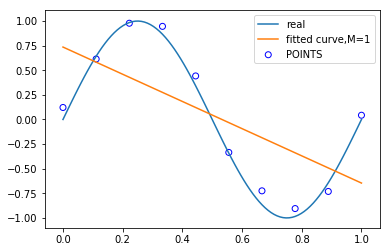

In [7]:
p_init = np.random.randn(2) 
plsq = leastsq(residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve,M=1')
pl.scatter(x, y1,label='POINTS',facecolor="none",edgecolor="blue")
pl.legend()
pl.show()

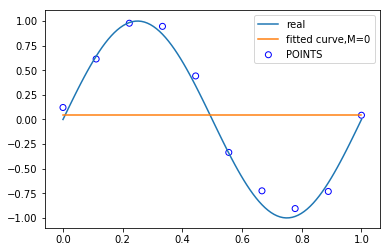

In [8]:
p_init = np.random.randn(1)
plsq = leastsq(residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve,M=0')
pl.scatter(x, y1,label='POINTS',facecolor="none",edgecolor="blue")
pl.legend()
pl.show()

In [9]:
#RMSE

In [10]:
def rmse(m, n):
    return np.sqrt(np.mean(np.square(m - n)))

In [11]:
error_train= []
error_test = []
x_train=np.random.rand(10)
y_train= real_func(x_train)
x_test = np.linspace(0, 1, 100)
y_test = real_func(x_test)+np.random.uniform(0,0.1)

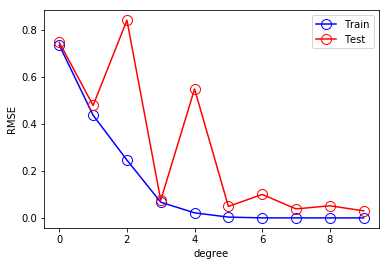

In [12]:
for i in range(10):
    p_init = np.random.randn(i+1)
    plsq1 = leastsq(residuals_func, p_init, args=(y_train, x_train))
    r_train=rmse(fit_func(plsq1[0], x_train),y_train)
    r_test=rmse(fit_func(plsq1[0], x_test), y_test)
    error_train.append(r_train)
    error_test.append(r_test)
plt.plot(error_train, 'o-', mfc="none", mec="blue", ms=10, c="blue", label="Train")
plt.plot(error_test, 'o-', mfc="none", mec="red", ms=10, c="red", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

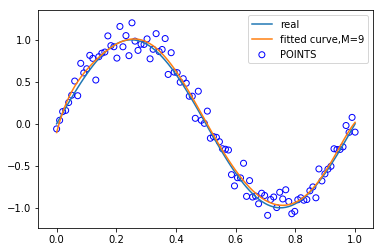

In [13]:
#Add Sample

N=100
x = np.linspace(0, 1, N)
x_points = np.linspace(0, 1, 100)
y0 = real_func(x)
y1 = [np.random.normal(0, 0.1) + y for y in y0] 

p_init = np.random.randn(9)  # initialize
plsq = leastsq(residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='fitted curve,M=9')
pl.scatter(x, y1,facecolor="none",edgecolor="blue", label='POINTS')
pl.legend()
pl.show()


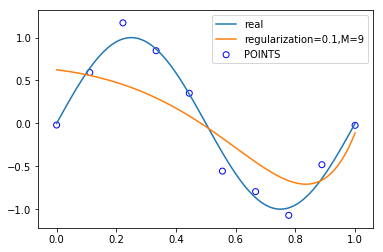

In [14]:
#regularization
regularization = 0.1
def re_residuals_func(p, y, x):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(regularization) * p)   
    return ret
N=10
x = np.linspace(0, 1, N)
x_points = np.linspace(0, 1, 100)
y0 = real_func(x)
y1 = [np.random.normal(0, 0.1) + y for y in y0] 
p_init = np.random.randn(9)  # initialize
plsq = leastsq(re_residuals_func, p_init, args=(y1, x))
pl.plot(x_points, real_func(x_points), label='real')
pl.plot(x_points, fit_func(plsq[0], x_points), label='regularization=0.1,M=9')
pl.scatter(x, y1,facecolor="none",edgecolor="blue", label='POINTS')
pl.legend()
pl.show()

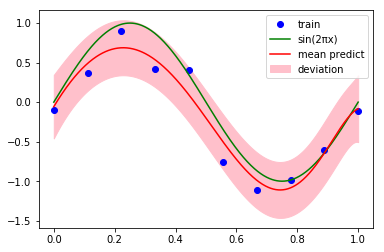

In [125]:
def phi(x, M):
    return x[:,None] ** np.arange(M + 1)
N = 10
x_train = np.linspace(0, 1, N)
t_train = np.sin(2 * np.pi * x_train) + 0.25 * np.random.randn(N)
#regulations
M = 9
alpha = 5e-3
beta = 11.1
lamda= alpha / beta
phi_x_tr = phi(x_train, M)
A_0 = phi_x_tr.T.dot(phi_x_tr) + lam * np.eye(M+1)
y_0 = t_tr.dot(phi_x_tr)
coeff = np.linalg.solve(A_0, y_0)[::-1]
#polynomial
f = np.poly1d(coeff)
xx = np.linspace(0, 1, 500)
S = np.linalg.inv(A_0 * beta)
m_xx = beta * phi(xx, M).dot(S).dot(y_0)
s_xx = np.sqrt(1 / beta + phi(xx, M).dot(S).dot(phi(xx, M).T).diagonal())
fig, ax = plt.subplots()
plt.plot(x_tr, t_tr,'co',color='b',label='train')
plt.plot(xx, np.sin(2 * np.pi * xx), 'g',label='sin(2πx)')
plt.plot(xx, f(xx), 'r',label='mean predict')
plt.fill_between(xx, m_xx-s_xx, m_xx+s_xx, color="pink",label='deviation')
plt.legend()
plt.show()

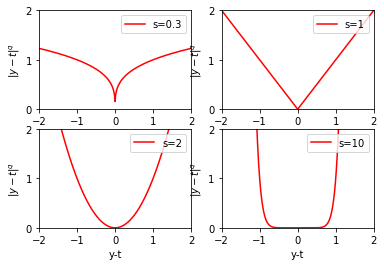

In [145]:
def lq(y,q):
    y=np.abs(y)
    return np.power(y,q)
Q=[0.3,1,2,10]
x=np.linspace(-2, 2, 1000)
for k,i in enumerate(Q):
    plt.subplot(2,2,k+ 1)
    plt.plot(x,lq(x,i),color="red",label='s=%s' % i)
    plt.ylim(0, 2)
    plt.xticks([-2, -1, 0, 1, 2])
    plt.xlim(-2,2)
    plt.yticks([ 0, 1, 2])
    plt.xlabel("y-t")
    plt.ylabel("$|y-t|^q$")
    plt.legend( loc='upper right')
plt.show()

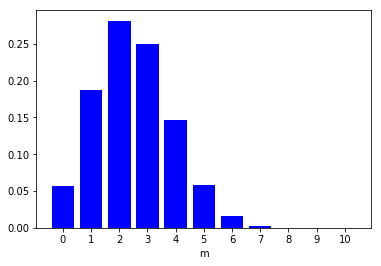

In [135]:
def Bin(m,N,u):
    return np.math.factorial(N)/(np.math.factorial(N-m)*np.math.factorial(m))*np.power(u,m)*np.power(1-u,N-m)
m=[0,1,2,3,4,5,6,7,8,9,10]
data=[]
for i in m:
    data.append(Bin(i,10,0.25))
plt.bar(m,data,color = 'blue')
plt.xlabel('m')
plt.xticks(np.arange(0,11))
plt.show()

C:\Users\yilun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


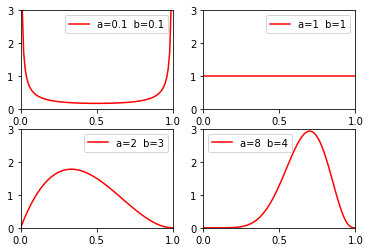

In [150]:
from scipy.special import gamma
def Beta(u,a,b):
    return gamma(a+b)/gamma(a)/gamma(b)*u**(a-1)*(1-u)**(b-1)
x = np.linspace(0, 1, 100)
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    plt.subplot(2, 2, i + 1)
    beta = Beta(x,a, b)
    plt.xlim(0, 1)
    plt.xticks([0,0.5,1])
    plt.ylim(0, 3)
    plt.yticks(np.arange(0,4))
    plt.plot(x, beta,color='red',label='a=%s  b=%s' % (a,b))
    plt.legend()
plt.show()

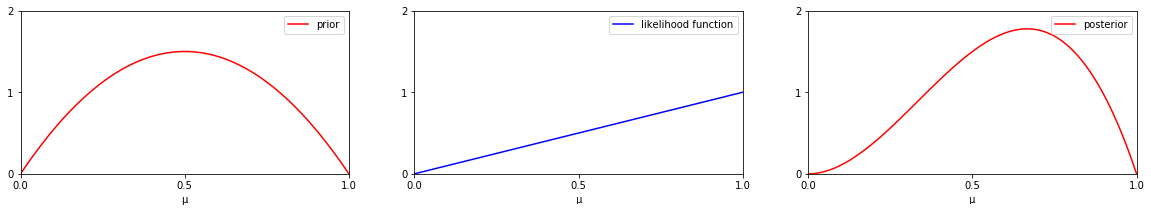

In [179]:
x=np.linspace(0,1,100)
listf=[[2,2],[0,0],[3,2]]
listl=['prior','likelihood function','posterior']
plt.figure(figsize=(20, 3))
for i in range(3):
    plt.subplot(1,3,i+1)
    
    plt.xlim(0, 1)
    plt.xticks([0,0.5,1])
    plt.ylim(0, 2)
    plt.yticks([0,1,2])
    plt.xlabel('μ')
    if i!=1:
        plt.plot(x,Beta(x,listf[i][0],listf[i][1]),color='r',label='%s' % listl[i])
    else:
        plt.plot(x,x,color='b',label=listl[i])
    plt.legend()
plt.show()